In [186]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as mo
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm, skew #math libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
%matplotlib inline

In [187]:
# loading the dataset 

df=pd.read_csv('trends1.csv',parse_dates=True)

In [188]:
df.head()

,Unnamed: 0,top 1,top 2,top 3,date
0,0,4,14,14,2012-10-07
1,1,7,15,18,2012-10-14
2,2,5,12,15,2012-10-21
3,3,5,15,12,2012-10-28
4,4,4,12,12,2012-11-04


In [189]:

df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [190]:
df.head()

,top 1,top 2,top 3,date
0,4,14,14,2012-10-07
1,7,15,18,2012-10-14
2,5,12,15,2012-10-21
3,5,15,12,2012-10-28
4,4,12,12,2012-11-04


In [191]:
df.dtypes

top 1     int64
top 2     int64
top 3     int64
date     object
dtype: object

In [192]:
import missingno as mo


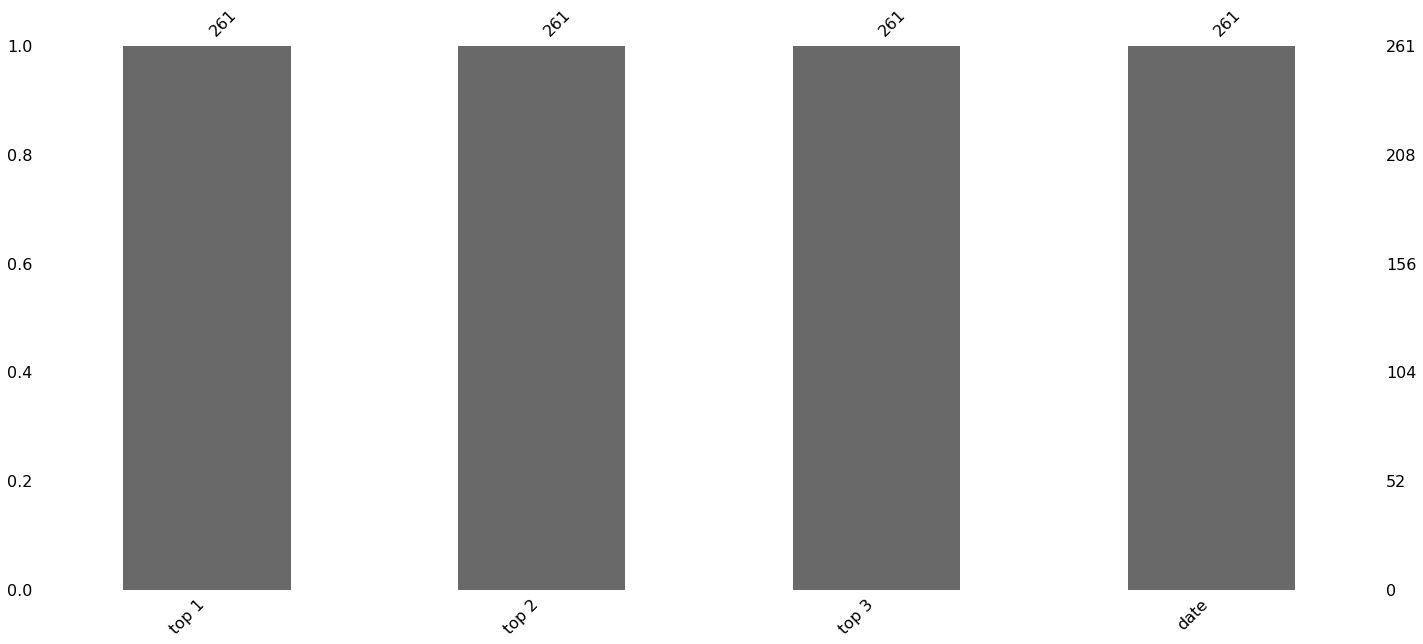

In [193]:
mo.bar(df)

In [194]:
def mko(df):
    mis_no = df.isnull().sum()/len(df) *100
    c=df.isnull().sum()
    miss_frame=pd.concat([c,mis_no],axis=1)
    renamecol=miss_frame.rename(columns={0:"Count",1:"Percentage"})
    renamecol=renamecol[renamecol["Count"]!=0]
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(renamecol.shape[0]) +
              " columns that have missing values.")
    return renamecol.round(4)

In [195]:
mko(df)

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


,Count,Percentage


The kurtosis of Sale Price is  -1.3837954497502456
The Skewness of Sale Price is  0.5015322104940879


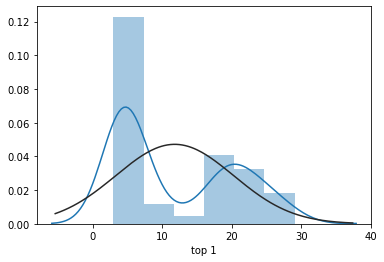

In [196]:
from scipy import stats
print('The kurtosis of Sale Price is ', df['top 1'].kurtosis())
print('The Skewness of Sale Price is ', df['top 1'].skew())
sb.distplot(df['top 1'],fit=stats.norm)


The kurtosis of Sale Price is  -0.37963706523181306
The Skewness of Sale Price is  0.5015322104940879


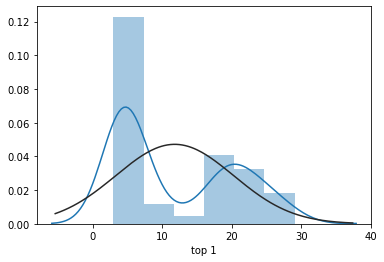

In [197]:
from scipy import stats
print('The kurtosis of Sale Price is ', df['top 2'].kurtosis())
print('The Skewness of Sale Price is ', df['top 1'].skew())
sb.distplot(df['top 1'],fit=stats.norm)


The kurtosis of Sale Price is  -0.9075600141241198
The Skewness of Sale Price is  0.3775216107377849


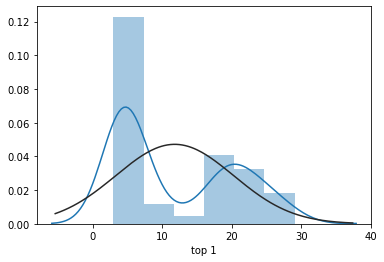

In [198]:
from scipy import stats
print('The kurtosis of Sale Price is ', df['top 3'].kurtosis())
print('The Skewness of Sale Price is ', df['top 3'].skew())
sb.distplot(df['top 1'],fit=stats.norm)


In [199]:
s=df[df['top 1'].isnull()]
s

,top 1,top 2,top 3,date


In [200]:
df['top 1'].unique()

array([ 4,  7,  5,  3,  6,  8, 10, 11, 12, 13, 17, 15, 18, 20, 23, 19, 26,
       24, 21, 29, 27, 28, 25, 22, 16], dtype=int64)

In [201]:
df['top 2'].unique()

array([ 14,  15,  12,  17,   9,  13,  11,  16,  18,  19,  20,  10,  21,
        22,  23,  24,  26,  25,  29,  27,  32,  30,  28,  41,  38,  42,
        45,  40,  51,  48,  53,  52,  67,  61,  64,  74,  77,  88,  78,
        83,  92,  84,  97,  98,  91,  93,  82,  80,  86,  87,  81,  70,
        72,  60,  55,  58,  57,  49,  54,  59,  66,  90, 100,  96,  95,
        89,  73,  62], dtype=int64)

In [202]:
df['top 3'].unique()

array([14, 18, 15, 12, 10, 11, 16, 13, 17, 23, 21, 20, 24, 26, 25, 27, 19,
       22, 29, 31, 32, 30, 34, 28, 36, 38, 41, 37, 39, 40, 33, 35, 42, 43],
      dtype=int64)

In [203]:
df.isnull().sum()

top 1    0
top 2    0
top 3    0
date     0
dtype: int64

In [204]:
df.drop("date",axis=1,inplace=True)

In [205]:
df.skew()

top 1    0.501532
top 2    1.064666
top 3    0.377522
dtype: float64

In [206]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

label = df.pop('top 1')

sc.fit(df)                                                                                   # fit the data to Standardscaler

df_scale = sc.transform(df)                                                               # transform the data

print('After standardizing our features, the first 2 rows of our data now look like this:\n')   # print the first 5 value after standardization
print(pd.DataFrame(df_scale, columns=df.columns).head())           

After standardizing our features, the first 2 rows of our data now look like this:

      top 2     top 3
0 -0.836862 -1.157687
1 -0.799222 -0.667770
2 -0.912140 -1.035208
3 -0.799222 -1.402645
4 -0.912140 -1.402645


In [207]:
X=df.drop(labels="top 1",axis=1)
y=df[["top 1"]]

KeyError: "['top 1'] not found in axis"

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_model = RandomForestRegressor(random_state = 0)

random_model.fit(X_train, y_train)

In [ ]:
y_pred_train = random_model.predict(X_train)

In [ ]:
y_pred_test=random_model.predict(X_test)

In [ ]:
y_pred_test

In [ ]:
from sklearn import metrics
MAE_train = metrics.mean_absolute_error(y_train,y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test ,y_pred_test)


print('MAE_train for the training dataset:',MAE_train)         
print('MAE_test for the test dataset:',MAE_test)  
 

In [ ]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [ ]:
print('RMSE for training set  for the random forest model is{}'.format(RMSE_train))
print('RMSE for test set for the random forest model  is {}'.format(RMSE_test))

In [ ]:
import sklearn.metrics as sm
print("R2 score =", round(sm.r2_score(y_test, y_pred_test), 2))

In [ ]:
print('Score for training data',random_model.score(X_train,y_train))
print('Score for testing data',random_model.score(X_test,y_test))

In [ ]:
y_test

In [ ]:
A=pd.DataFrame(data=y_pred_test)

In [ ]:
A

In [ ]:
y_test.reset_index(inplace=True)

In [ ]:
y_test.drop("index",axis=1,inplace=True)

In [ ]:
z=y_test.join(A)

In [ ]:
z.rename(columns={'top 1': 'Actual',0:'Random forest Predicted'},inplace=True)

In [ ]:
print("prediction made using the random forest Algorithm")
z

In [ ]:
#appplying k neigbours  regressor ALGORITHM

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
y_pred_train_knn_model = knn.predict(X_train)

In [ ]:
y_pred_test_knn_model = knn.predict(X_test)

In [ ]:
from sklearn import metrics
MAE_train = metrics.mean_absolute_error(y_train,y_pred_train_knn_model)
MAE_test = metrics.mean_absolute_error(y_test ,y_pred_test_knn_model)


print('MAE_train for the training dataset:',MAE_train)         
print('MAE_test for the test dataset:',MAE_test)  
 

In [ ]:
RMSE_train_knn_model = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_knn_model))
RMSE_test_knn_model = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_knn_model))

In [ ]:
print('RMSE for training set is {}'.format(RMSE_train_knn_model))
print('RMSE for test set is {}'.format(RMSE_test_knn_model))

In [ ]:
import sklearn.metrics as sm
print("R2 score =", round(sm.r2_score(y_test, y_pred_test_knn_model), 2))

In [ ]:
y_test

In [ ]:
B=pd.DataFrame(data=y_pred_test_knn_model)

In [ ]:
y=y_test.join(B)

In [ ]:
y.rename(columns={'top 1': 'Actual',0:'Knn  Predicted'},inplace=True)

In [ ]:
y

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
y_pred_train_lr_model = lr.predict(X_train)

In [ ]:
y_pred_test_lr_model = lr.predict(X_test)

In [ ]:
from sklearn import metrics
MAE_train = metrics.mean_absolute_error(y_train,y_pred_train_lr_model)
MAE_test = metrics.mean_absolute_error(y_test ,y_pred_test_lr_model)


print('MAE_train for the training dataset:',MAE_train)         
print('MAE_test for the test dataset:',MAE_test)  

In [ ]:
RMSE_train_lr_model = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_lr_model))
RMSE_test_lr_model = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_lr_model))

In [ ]:
print('RMSE for training set is {}'.format(RMSE_train_lr_model))
print('RMSE for test set is {}'.format(RMSE_test_lr_model))

In [ ]:
import sklearn.metrics as sm
print("R2 score =", round(sm.r2_score(y_test, y_pred_test_lr_model), 2))

In [ ]:
C=pd.DataFrame(data=y_pred_test_lr_model)

In [ ]:
x=y_test.join(C)

In [ ]:
x.rename(columns={'top 1': 'Actual',0:'Linear Regression Predicted'},inplace=True)

In [ ]:
x.head()

In [ ]:
y.head()

In [ ]:
z.head()

In [ ]:
#comparing the three rmse of the testing set only to choose the best model 

print('RMSE for test set using knn model is {}'.format(RMSE_test_knn_model))
print('RMSE for test set using random forest model is {}'.format(RMSE_test)) 
print('RMSE for test set using lr model is {}'.format(RMSE_test_lr_model))

print()

print('RMSE for test set using knn model is {}'.format(RMSE_train_knn_model))
print('RMSE for test set using knn model is {}'.format(RMSE_test_knn_model))

- looking the rmse  we choose the knn model to be the best 

- however looking at the rmse of the training and testing it is still a underfitted model 

In [ ]:
print("R2 score of lr model is =", round(sm.r2_score(y_test, y_pred_test_lr_model), 2))
print("R2 score of Random forest  model is =", round(sm.r2_score(y_test, y_pred_test), 2))
print("R2 score of K nearest neigbours  model is =", round(sm.r2_score(y_test, y_pred_test_knn_model), 2))

In [ ]:
zzz=z.join(B)

In [ ]:
xxx= z.join(C)

In [ ]:
zzz.head()

In [ ]:
 zzz['Linear_regression']=C

In [ ]:
zzz.rename(columns={0:'Knn Predicted'},inplace=True)

In [ ]:
zzz